In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<Axes: xlabel='times', ylabel='accel'>

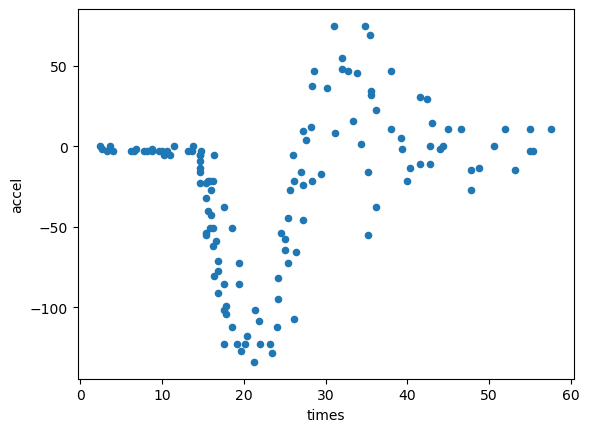

In [2]:
df=pd.read_csv("/workspaces/studypython/src/ゼミ/data/オートバイ衝突実験データ.csv")
df.plot.scatter(x="times",y="accel")

In [3]:
df

,times,accel
0,2.4,0.0
1,2.6,-1.3
2,3.2,-2.7
3,3.6,0.0
4,4.0,-2.7
...,...,...
128,53.2,-14.7
129,55.0,-2.7
130,55.0,10.7
131,55.4,-2.7


In [4]:
def create_knot(df,m):
    pre_knot=np.linspace(start=df.iat[0,0],stop=df.iat[df.shape[0]-1,0],num=m-2,retstep=True)
    start=np.linspace(df.iat[0,0]-3*pre_knot[1],df.iat[0,0]-pre_knot[1],3)
    end=np.linspace(df.iat[df.shape[0]-1,0]+pre_knot[1],df.iat[df.shape[0]-1,0]+3*pre_knot[1],3)
    knot=np.append(start,pre_knot[0])
    knot=np.append(knot,end)
    return knot

create_knot(df,10)

array([-21.25714286, -13.37142857,  -5.48571429,   2.4       ,
        10.28571429,  18.17142857,  26.05714286,  33.94285714,
        41.82857143,  49.71428571,  57.6       ,  65.48571429,
        73.37142857,  81.25714286])

In [5]:
def b_spline(knot,j,x,r):
    if r==0:
        if knot[j]<=x<knot[j+1]:
            return 1
        else:
            return 0
    else:
        return (x-knot[j])*b_spline(knot,j,x,r-1)/(knot[j+r]-knot[j])+(knot[j+r+1]-x)*b_spline(knot,j+1,x,r-1)/(knot[j+r+1]-knot[j+1])

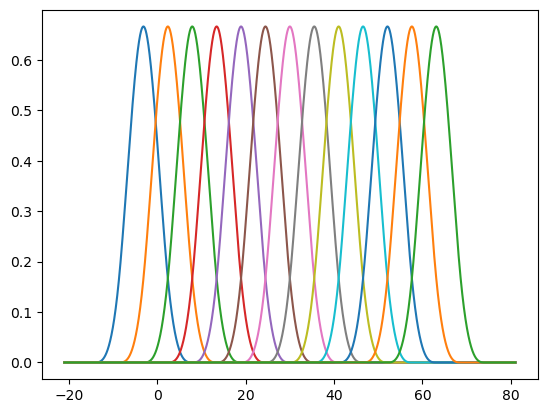

In [6]:
basis_num=13
knot=create_knot(df,basis_num)
x=np.linspace(-21,81,10000)
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
for j in range(basis_num):
    y=[b_spline(knot,j,i,3) for i in x]
    ax.plot(x,y)

plt.show()

In [7]:
B=np.zeros((df.shape[0],basis_num))


In [8]:
x=df.iloc[:,0]
y=np.array([df.iloc[:,1]]).T
y

array([[   0. ],
       [  -1.3],
       [  -2.7],
       [   0. ],
       [  -2.7],
       [  -2.7],
       [  -2.7],
       [  -1.3],
       [  -2.7],
       [  -2.7],
       [  -1.3],
       [  -2.7],
       [  -2.7],
       [  -2.7],
       [  -5.4],
       [  -2.7],
       [  -5.4],
       [   0. ],
       [  -2.7],
       [  -2.7],
       [   0. ],
       [ -13.3],
       [  -5.4],
       [  -5.4],
       [  -9.3],
       [ -16. ],
       [ -22.8],
       [  -2.7],
       [ -22.8],
       [ -32.1],
       [ -53.5],
       [ -54.9],
       [ -40.2],
       [ -21.5],
       [ -21.5],
       [ -50.8],
       [ -42.9],
       [ -26.8],
       [ -21.5],
       [ -50.8],
       [ -61.7],
       [  -5.4],
       [ -80.4],
       [ -59. ],
       [ -71. ],
       [ -91.1],
       [ -77.7],
       [ -37.5],
       [ -85.6],
       [-123.1],
       [-101.9],
       [ -99.1],
       [-104.4],
       [-112.5],
       [ -50.8],
       [-123.1],
       [ -85.6],
       [ -72.3],
       [-127.2

In [9]:
for i in range(df.shape[0]):
    for j in range(basis_num):
        B[i][j]=b_spline(knot,j,x[i],3)


In [10]:
y_hat=B@np.linalg.inv(B.T @ B) @ B.T @ y

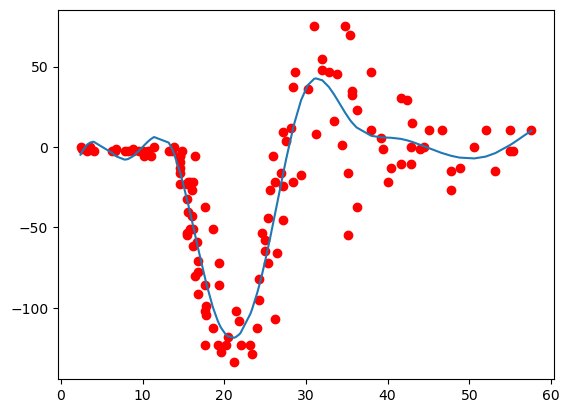

In [11]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(x,y_hat)
ax.scatter(df.iloc[:,0],df.iloc[:,1],color="red")
plt.show()

In [12]:
x_10000=np.linspace(knot[0],knot[-1],10000)
X=np.zeros((len(x_10000),basis_num))

for i in range(len(x_10000)):
    for j in range(basis_num):
        X[i][j]=b_spline(knot,j,x_10000[i],3)

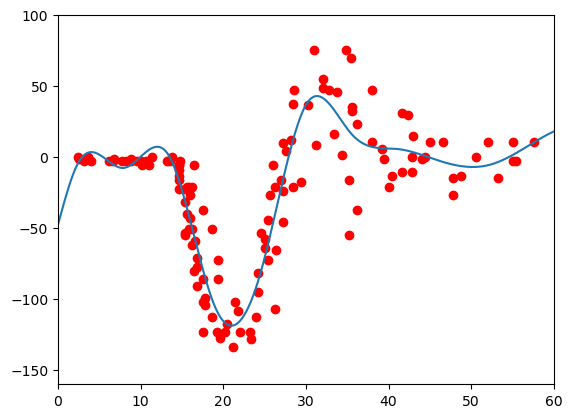

In [13]:
y_graph=X@np.linalg.inv(B.T @ B) @ B.T @ y

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(x_10000,y_graph)
ax.scatter(df.iloc[:,0],df.iloc[:,1],color="red")
ax.set_xlim(0,60)
ax.set_ylim(-160,100)
plt.show()

In [14]:
x

0       2.4
1       2.6
2       3.2
3       3.6
4       4.0
       ... 
128    53.2
129    55.0
130    55.0
131    55.4
132    57.6
Name: times, Length: 133, dtype: float64

In [15]:
y

array([[   0. ],
       [  -1.3],
       [  -2.7],
       [   0. ],
       [  -2.7],
       [  -2.7],
       [  -2.7],
       [  -1.3],
       [  -2.7],
       [  -2.7],
       [  -1.3],
       [  -2.7],
       [  -2.7],
       [  -2.7],
       [  -5.4],
       [  -2.7],
       [  -5.4],
       [   0. ],
       [  -2.7],
       [  -2.7],
       [   0. ],
       [ -13.3],
       [  -5.4],
       [  -5.4],
       [  -9.3],
       [ -16. ],
       [ -22.8],
       [  -2.7],
       [ -22.8],
       [ -32.1],
       [ -53.5],
       [ -54.9],
       [ -40.2],
       [ -21.5],
       [ -21.5],
       [ -50.8],
       [ -42.9],
       [ -26.8],
       [ -21.5],
       [ -50.8],
       [ -61.7],
       [  -5.4],
       [ -80.4],
       [ -59. ],
       [ -71. ],
       [ -91.1],
       [ -77.7],
       [ -37.5],
       [ -85.6],
       [-123.1],
       [-101.9],
       [ -99.1],
       [-104.4],
       [-112.5],
       [ -50.8],
       [-123.1],
       [ -85.6],
       [ -72.3],
       [-127.2

In [16]:
sigma_hat=(y-y_hat).T@(y-y_hat)/df.shape[0]
sigma_hat

array([[464.30203311]])

In [17]:
AIC=pd.DataFrame(columns=["AIC"])
AIC

,AIC


In [18]:

for basis_num in range(3,50):
    knot=create_knot(df,basis_num)
    B=np.zeros((df.shape[0],basis_num))
    for i in range(df.shape[0]):
        for j in range(basis_num):
            B[i][j]=b_spline(knot,j,x[i],3)
    y_hat=B@np.linalg.inv(B.T@B)@B.T@y
    sigma_hat=(y-y_hat).T@(y-y_hat)/df.shape[0]
    aic=df.shape[0]*np.log(2*np.pi*sigma_hat)+df.shape[0]+2*(basis_num+2)
    add_data=pd.DataFrame(aic.reshape(1,1),index=[basis_num],columns=["AIC"])
    AIC=pd.concat([AIC,add_data])

AIC

/tmp/ipykernel_775/1822300486.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  AIC=pd.concat([AIC,add_data])


LinAlgError: Singular matrix

In [ ]:
AIC.to_csv("/workspaces/studypython/src/ゼミ/data/AIC.csv")

<Axes: >

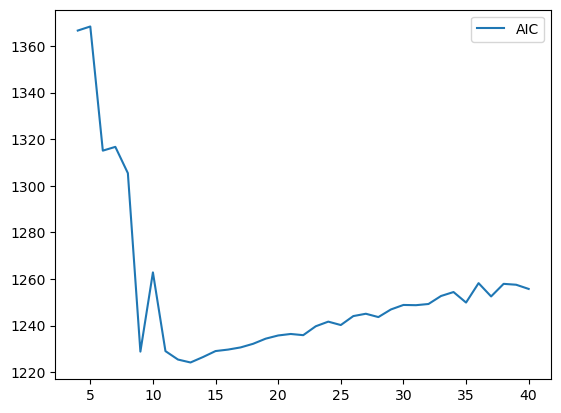

In [ ]:
AIC.plot()